Necessary Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Reading the data from the csv

In [3]:
df = pd.read_csv("handwritten_data_785.csv")
type(df)

pandas.core.frame.DataFrame

Separating the Image data and Labels

In [4]:
arr = np.array(df)
data = arr[:, 1:] / 255
target = arr[:, 0]

Train-Test Split

In [5]:
XTrainFull, XTest, yTrainFull, yTest = train_test_split(data, target)
XTrain, XValid, yTrain, yValid = train_test_split(XTrainFull, yTrainFull)

Simply training the data without any changes
2 hidden layers with 300 and 100 neurons each

In [8]:
# Build a simple mlp model
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model = keras.Model(inputs=input, outputs=output)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 21s 3ms/step - loss: 0.7192 - accuracy: 0.8102 - val_loss: 0.4311 - val_accuracy: 0.8842
Epoch 2/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.3647 - accuracy: 0.9034 - val_loss: 0.3063 - val_accuracy: 0.9178
Epoch 3/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.2728 - accuracy: 0.9278 - val_loss: 0.2439 - val_accuracy: 0.9350
Epoch 4/30
6540/6540 [==============================] - 18s 3ms/step - loss: 0.2214 - accuracy: 0.9417 - val_loss: 0.2039 - val_accuracy: 0.9461
Epoch 5/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.1892 - accuracy: 0.9500 - val_loss: 0.1793 - val_accuracy: 0.9526
Epoch 6/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.1668 - accuracy: 0.9564 - val_loss: 0.1652 - val_accuracy: 0.9568
Epoch 7/30
6540/6540 [==============================] - 18s 3ms/step - loss: 0.1503 - accuracy: 0.9605 - val_loss: 0.1516 - val_ac

Evaluating the model

In [9]:
model.evaluate(XTest, yTest)

2907/2907 [==============================] - 5s 2ms/step - loss: 0.0896 - accuracy: 0.9774


[0.08964746445417404, 0.977378785610199]

Visually checking the image to see whether prediction is correct

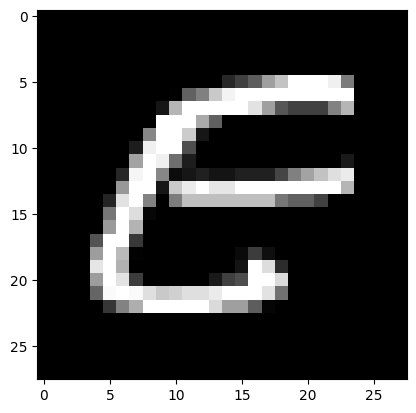

In [12]:
example = XTest[0]
example = example.reshape((28,28))
plt.imshow(example, cmap='gray')

The prediction

In [10]:
yPred = model.predict(XTest[:3]).round(2)
print(yPred)
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)

1/1 [==============================] - 1s 745ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]]
[4, 15, 19]


Training the data with 10 times less neurons in the hidden layers to see the difference in training time and accuracy

In [13]:
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model1 = keras.Model(inputs=input, outputs=output)

model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model1.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 58s 9ms/step - loss: 1.0885 - accuracy: 0.6959 - val_loss: 0.6299 - val_accuracy: 0.8243
Epoch 2/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.5494 - accuracy: 0.8518 - val_loss: 0.4794 - val_accuracy: 0.8710
Epoch 3/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.4555 - accuracy: 0.8782 - val_loss: 0.4218 - val_accuracy: 0.8875
Epoch 4/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.4093 - accuracy: 0.8908 - val_loss: 0.4051 - val_accuracy: 0.8903
Epoch 5/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3790 - accuracy: 0.8988 - val_loss: 0.3935 - val_accuracy: 0.8908
Epoch 6/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3570 - accuracy: 0.9043 - val_loss: 0.3571 - val_accuracy: 0.9039
Epoch 7/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3399 - accuracy: 0.9084 - val_loss: 0.3352 - val_ac

Evaluating the model

In [14]:
model1.evaluate(XTest, yTest)

2907/2907 [==============================] - 4s 1ms/step - loss: 0.2327 - accuracy: 0.9387


[0.23269116878509521, 0.9387485384941101]

In [15]:
yPred = model1.predict(XTest[:3])
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)
print(yTest[:3])

1/1 [==============================] - 0s 227ms/step
[4, 15, 19]
[ 4 15 19]


Applying Feature extraction using Principal Component Analysis on the data to reduce complexity of the model

Fitting the data and Plotting the Scree Graph to find the optimal dimensionality

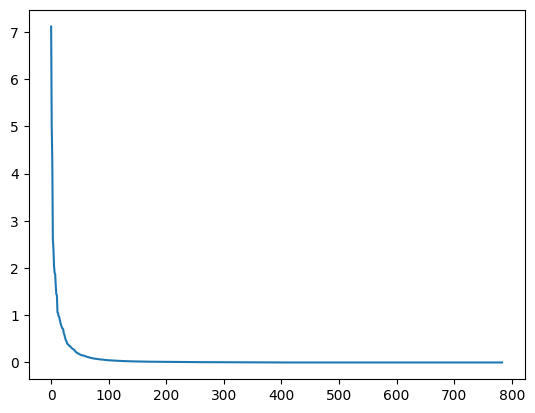

In [16]:
pca = PCA()
pca.fit(XTrain)
variance = pca.explained_variance_

plt.plot(variance)

Since the Graph flattens at approximately 80 dimensions, that's what we will go with

In [17]:
pca = PCA(n_components=80)
pca.fit(XTrain)
variance = pca.explained_variance_
# pd.DataFrame(variance).to_csv('Explained_variance.csv')

We can still reduce more but it is not really needed (80 to 70 will not give that much of a difference)

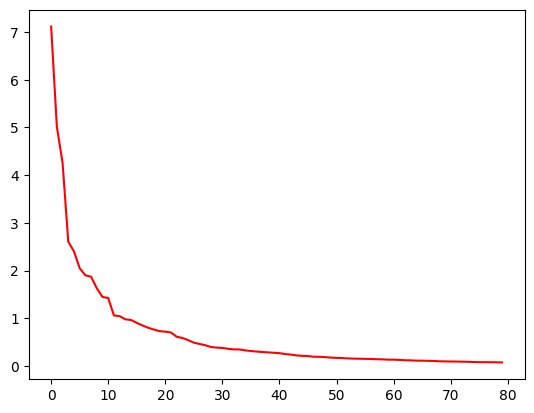

In [18]:
plt.plot(variance, "r-")

Components is the matrix containing the 80 Eigen Vectors with the largest Eigen Values

In [19]:
components = pca.components_
components.shape

(80, 784)

Transforming XTrain, XValid and XTest from 784 to 80 dimensions

In [20]:
XTrainTransformed = pca.transform(XTrain)
XValidTransformed = pca.transform(XValid)
XTestTransformed = pca.transform(XTest)

Training on the same model as the first one just with the decrease in inputs

In [21]:
input = keras.layers.Input(shape=[80])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrainTransformed, yTrain, epochs=30, validation_data=(XValidTransformed, yValid))

Epoch 1/30
6540/6540 [==============================] - 14s 2ms/step - loss: 0.6922 - accuracy: 0.8149 - val_loss: 0.3588 - val_accuracy: 0.9037
Epoch 2/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.3044 - accuracy: 0.9183 - val_loss: 0.2542 - val_accuracy: 0.9319
Epoch 3/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.2305 - accuracy: 0.9386 - val_loss: 0.2072 - val_accuracy: 0.9443
Epoch 4/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.1922 - accuracy: 0.9488 - val_loss: 0.1798 - val_accuracy: 0.9515
Epoch 5/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.1676 - accuracy: 0.9556 - val_loss: 0.1623 - val_accuracy: 0.9564
Epoch 6/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.1504 - accuracy: 0.9606 - val_loss: 0.1510 - val_accuracy: 0.9593
Epoch 7/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.1374 - accuracy: 0.9643 - val_loss: 0.1404 - val_ac

Evaluating the model

There was an approximately 3 minutes decrease in training time in comparison to the equivalent model with 784 dimensions with effectively the same accuracy (reduced from 97.7% to 97.6%)

In [22]:
modelWithPca.evaluate(XTestTransformed, yTest)

2907/2907 [==============================] - 4s 1ms/step - loss: 0.0900 - accuracy: 0.9768


[0.0900423601269722, 0.9767767190933228]

Testing with 10 times less neurons and an additional hidden layer with 10 neurons. This was a test to see if decreasing neurons but increasing layers in a way that reduced the total no. of weights could potentially work. This one was not up to the mark (Time decrease of approx 1min with accuracy of 94.4%)

In [23]:
input = keras.layers.Input(shape=[80])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
hidden3 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden2)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden3)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrainTransformed, yTrain, epochs=30, validation_data=(XValidTransformed, yValid))

Epoch 1/30
6540/6540 [==============================] - 11s 2ms/step - loss: 1.3666 - accuracy: 0.6103 - val_loss: 0.6813 - val_accuracy: 0.8084
Epoch 2/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.5486 - accuracy: 0.8472 - val_loss: 0.4457 - val_accuracy: 0.8745
Epoch 3/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.4136 - accuracy: 0.8849 - val_loss: 0.3731 - val_accuracy: 0.8964
Epoch 4/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3545 - accuracy: 0.9019 - val_loss: 0.3275 - val_accuracy: 0.9081
Epoch 5/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.3178 - accuracy: 0.9114 - val_loss: 0.2986 - val_accuracy: 0.9165
Epoch 6/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.2934 - accuracy: 0.9186 - val_loss: 0.2817 - val_accuracy: 0.9208
Epoch 7/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.2748 - accuracy: 0.9242 - val_loss: 0.2643 - val_ac

Evaluating

In [24]:
modelWithPca.evaluate(XTestTransformed, yTest)

2907/2907 [==============================] - 3s 1ms/step - loss: 0.2074 - accuracy: 0.9442


[0.2073644995689392, 0.9441995620727539]

Now using a Supervised Feature Extraction Technique: Linear Discriminant Analysis. In most situations, LDA performs better than PCA but the shape of this dataset did not allow that

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=25)

XTrainLda = lda.fit_transform(XTrain, yTrain)
XValidLda = lda.transform(XValid)
XTestLda = lda.transform(XTest)

input = keras.layers.Input(shape=[25])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithLda = keras.Model(inputs=input, outputs=output)

modelWithLda.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = modelWithLda.fit(XTrainLda, yTrain, epochs=30, validation_data=(XValidLda, yValid))

Epoch 1/30
6540/6540 [==============================] - 14s 2ms/step - loss: 0.7047 - accuracy: 0.8147 - val_loss: 0.4527 - val_accuracy: 0.8738
Epoch 2/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.3992 - accuracy: 0.8891 - val_loss: 0.3579 - val_accuracy: 0.8970
Epoch 3/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3283 - accuracy: 0.9084 - val_loss: 0.3053 - val_accuracy: 0.9140
Epoch 4/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2881 - accuracy: 0.9197 - val_loss: 0.2764 - val_accuracy: 0.9212
Epoch 5/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2617 - accuracy: 0.9269 - val_loss: 0.2571 - val_accuracy: 0.9270
Epoch 6/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2432 - accuracy: 0.9323 - val_loss: 0.2418 - val_accuracy: 0.9316
Epoch 7/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2291 - accuracy: 0.9357 - val_loss: 0.2315 - val_ac

The model performed worse not because of a problem inherent with LDA but because of the difference in the no. of dimensions and the no. of classes in this dataset. 

LDA, because of the Mathematics behind it, can reduce the dimensions to at most the minimum between the no. of Classes - 1 and the no. of original dimensions. In this dataset they were 26 and 784 respectively, so LDA could go at most 25, which could not retain as much information as needed about the original 784

In [26]:
modelWithLda.evaluate(XTestLda, yTest)

2907/2907 [==============================] - 4s 1ms/step - loss: 0.1794 - accuracy: 0.9483


[0.17941415309906006, 0.9482743740081787]

Just as a test, let's see what happens if we apply LDA to the reduced dataset after PCA

In [27]:
lda = LinearDiscriminantAnalysis(n_components=25)

XTrainLdaPca = lda.fit_transform(XTrainLda, yTrain)
XValidLdaPca = lda.transform(XValidLda)
XTestLdaPca = lda.transform(XTestLda)

input = keras.layers.Input(shape=[25])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithLdaPca = keras.Model(inputs=input, outputs=output)

modelWithLdaPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = modelWithLdaPca.fit(XTrainLdaPca, yTrain, epochs=30, validation_data=(XValidLdaPca, yValid))

Epoch 1/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.7091 - accuracy: 0.8117 - val_loss: 0.4498 - val_accuracy: 0.8737
Epoch 2/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3991 - accuracy: 0.8882 - val_loss: 0.3517 - val_accuracy: 0.9000
Epoch 3/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3257 - accuracy: 0.9088 - val_loss: 0.3019 - val_accuracy: 0.9152
Epoch 4/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2851 - accuracy: 0.9198 - val_loss: 0.2730 - val_accuracy: 0.9222
Epoch 5/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2594 - accuracy: 0.9272 - val_loss: 0.2523 - val_accuracy: 0.9286
Epoch 6/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2413 - accuracy: 0.9321 - val_loss: 0.2395 - val_accuracy: 0.9311
Epoch 7/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.2277 - accuracy: 0.9357 - val_loss: 0.2280 - val_ac

This somehow turned out slightly better with both a reduce in time and slightly improved accuracy. Was it just because of the randomness while initializing the weights or is there some reason?

In [28]:
modelWithLdaPca.evaluate(XTestLdaPca, yTest)

2907/2907 [==============================] - 4s 1ms/step - loss: 0.1741 - accuracy: 0.9514


[0.17408370971679688, 0.9513815641403198]